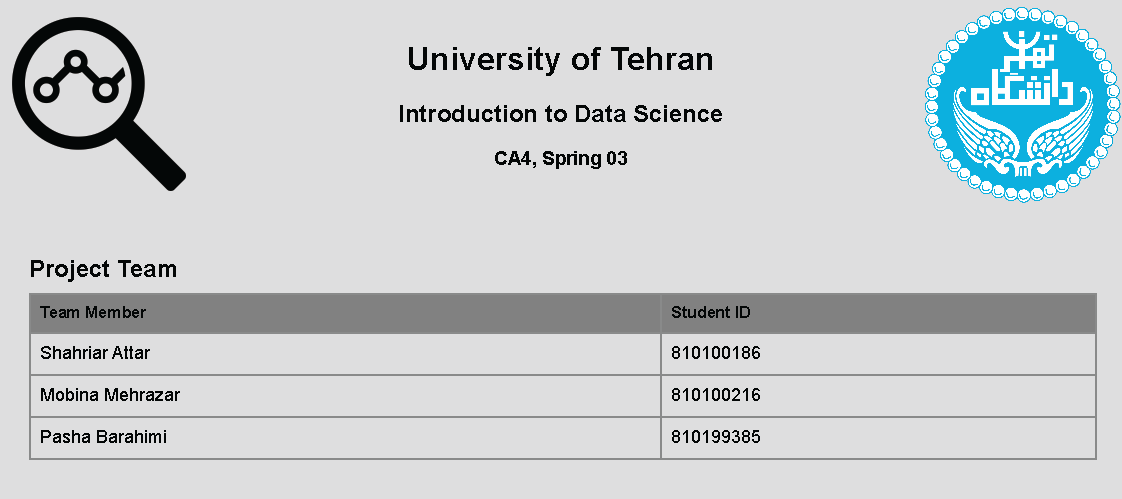


# Loss Functions

## Table of Contents

-   [Loss Functions](#loss-functions)
    -   [Introduction](#introduction)
    -   [Objectives](#objectives)
    -   [Tasks](#tasks)
    -   [Dataset Description](#dataset-description)
    -   [Environment Setup](#environment-setup)
    -   [Warm-Up](#warm-up)
        -   [Loading the Dataset](#loading-the-dataset)
        -   [Handling Missing Values](#handling-missing-values)
        -   [Feature Normalization](#feature-normalization)
        -   [Splitting the Dataset](#splitting-the-dataset)
    -   [Main Task](#main-task)
        -   [Part 1. Functions' Implementation](#part-1-functions-implementation)
            -   [Mean Squared Error (MSE)](#mean-squared-error-mse)
            -   [Mean Absolute Error (MAE)](#mean-absolute-error-mae)
            -   [Root Mean Squared Error (RMSE)](#root-mean-squared-error-rmse)
            -   [R² Score](#r²-score)
        -   [Part 2. Building and Training the Linear Regression Model](#part-2-building-and-training-the-linear-regression-model)
        -   [Part 3. Model Evaluation](#part-3-model-evaluation)
        -   [Part 4. Ordinary Least Squares](#part-4-ordinary-least-squares)
    -   [Questions](#questions)
    -   [References](#references)

## Introduction

In this assignment, we will explore various loss functions and apply gradient descent methods to optimize these functions. Our focus will be on the Diabetes dataset from the `scikit-learn` library, a well-regarded dataset in the machine learning community. This dataset consists of medical diagnostic measurements from numerous patients and is specifically designed to study diabetes progression.

## Objectives

The purpose of this assignment is as follows:

-   Using these data points to predict the quantitative measure of disease progression one year after baseline.
-   Practicing the application of regression analysis in a medical context.

## Tasks

Warm-Up:

1. Loading the Diabetes dataset from the `scikit-learn` library.
2. Handling missing values.
3. Normalizing the features.
4. Splitting the dataset.

Main Task:

5. Implementing the Mean Squared Error (MSE), Mean Absolute Error (MAE), Root Mean Squared Error (RMSE), and R² Score functions.
6. Building and training a linear regression model using the Diabetes dataset.
7. Evaluating the model using the loss functions implemented in Task 5.
8. Implementing the Ordinary Least Squares method to estimate the coefficients of the linear regression model.

## Dataset Description

The diabetes dataset consists of 442 instances with the following ten baseline variables:

-   Age (age in years)
-   Sex
-   Body Mass Index (BMI)
-   Average Blood Pressure (BP)
-   Six blood serum measurements:
    -   s1: tc, total serum cholesterol
    -   s2: ldl, low-density lipoproteins
    -   s3: hdl, high-density lipoproteins
    -   s4: tch, total cholesterol / HDL
    -   s5: ltg, possibly log of serum triglycerides level
    -   s6: glu, blood sugar level

The target variable is a quantitative measure of disease progression one year after baseline.


## Environment Setup

Let's begin with setting up the Python environment and importing the necessary libraries.


In [65]:
from typing import Callable, Any
from tabulate import tabulate

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
from IPython.display import display

from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, SGDRegressor
from sklearn.svm import SVR, LinearSVR, NuSVR
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.neural_network import MLPRegressor
from sklearn import tree

import shap

In [66]:
shap.initjs()
matplotlib.use('nbagg')
%matplotlib inline

In [67]:
TEST_SIZE = 0.05
RANDOM_STATE = 42

## Warm-Up

### Loading the Dataset

First, we'll load the diabetes dataset provided by [scikit-learn](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_diabetes.html) (scaled=False) or directly via [this link](https://www4.stat.ncsu.edu/~boos/var.select/diabetes.html).


In [68]:
diabetes = load_diabetes(scaled=False)

Let's display the first ten rows of the dataset to understand its structure.


In [69]:
data = pd.DataFrame(data=diabetes.data, columns=diabetes.feature_names)
data["target"] = diabetes.target
data.head(n=10)

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,59.0,2.0,32.1,101.0,157.0,93.2,38.0,4.00,4.8598,87.0,151.0
1,48.0,1.0,21.6,87.0,183.0,103.2,70.0,3.00,3.8918,69.0,75.0
2,72.0,2.0,30.5,93.0,156.0,93.6,41.0,4.00,4.6728,85.0,141.0
3,24.0,1.0,25.3,84.0,198.0,131.4,40.0,5.00,4.8903,89.0,206.0
4,50.0,1.0,23.0,101.0,192.0,125.4,52.0,4.00,4.2905,80.0,135.0
5,23.0,1.0,22.6,89.0,139.0,64.8,61.0,2.00,4.1897,68.0,97.0
6,36.0,2.0,22.0,90.0,160.0,99.6,50.0,3.00,3.9512,82.0,138.0
7,66.0,2.0,26.2,114.0,255.0,185.0,56.0,4.55,4.2485,92.0,63.0
8,60.0,2.0,32.1,83.0,179.0,119.4,42.0,4.00,4.4773,94.0,110.0
9,29.0,1.0,30.0,85.0,180.0,93.4,43.0,4.00,5.3845,88.0,310.0


In [70]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     442 non-null    float64
 1   sex     442 non-null    float64
 2   bmi     442 non-null    float64
 3   bp      442 non-null    float64
 4   s1      442 non-null    float64
 5   s2      442 non-null    float64
 6   s3      442 non-null    float64
 7   s4      442 non-null    float64
 8   s5      442 non-null    float64
 9   s6      442 non-null    float64
 10  target  442 non-null    float64
dtypes: float64(11)
memory usage: 38.1 KB


Also, we will print the data types of each feature to ensure they are numeric.


In [71]:
print(data.dtypes)

age       float64
sex       float64
bmi       float64
bp        float64
s1        float64
s2        float64
s3        float64
s4        float64
s5        float64
s6        float64
target    float64
dtype: object


As we can see, all of the columns have a numeric data type.


### Handling Missing Values

Then, we should check for any missing values in the dataset and handle them appropriately (if missing values exist).


In [72]:
print(data.isnull().sum())

age       0
sex       0
bmi       0
bp        0
s1        0
s2        0
s3        0
s4        0
s5        0
s6        0
target    0
dtype: int64


There is no missing data in the dataset, so we can proceed to the next step.


### Feature Normalization

After that, we will normalize the features to ensure all are on a similar scale.


In [73]:
scaler = MinMaxScaler()
data = pd.DataFrame(scaler.fit_transform(data), columns=data.columns)
data.head(n=10)

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.666667,1.0,0.582645,0.549296,0.294118,0.256972,0.207792,0.282087,0.562217,0.439394,0.392523
1,0.483333,0.0,0.148760,0.352113,0.421569,0.306773,0.623377,0.141044,0.222437,0.166667,0.155763
2,0.883333,1.0,0.516529,0.436620,0.289216,0.258964,0.246753,0.282087,0.496578,0.409091,0.361371
3,0.083333,0.0,0.301653,0.309859,0.495098,0.447211,0.233766,0.423131,0.572923,0.469697,0.563863
4,0.516667,0.0,0.206612,0.549296,0.465686,0.417331,0.389610,0.282087,0.362385,0.333333,0.342679
5,0.066667,0.0,0.190083,0.380282,0.205882,0.115538,0.506494,0.000000,0.327003,0.151515,0.224299
6,0.283333,1.0,0.165289,0.394366,0.308824,0.288845,0.363636,0.141044,0.243287,0.363636,0.352025
7,0.783333,1.0,0.338843,0.732394,0.774510,0.714143,0.441558,0.359661,0.347643,0.515152,0.118380
8,0.683333,1.0,0.582645,0.295775,0.401961,0.387450,0.259740,0.282087,0.427955,0.545455,0.264798
9,0.166667,0.0,0.495868,0.323944,0.406863,0.257968,0.272727,0.282087,0.746393,0.454545,0.887850


### Splitting the Dataset

Finally, we'll split the data into training and testing sets using a standard ratio (e.g., 95% training, 5% testing). We'll utilize sklearn's train_test_split function or an equivalent method ensuring a random split.


In [74]:
x = data.drop("target", axis=1)
y = data["target"]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=TEST_SIZE, random_state=RANDOM_STATE)
x_train_summary = shap.kmeans(x_train, 10) 

Also, we will display the number of instances in both the training and the testing datasets to confirm the split.


In [75]:
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(419, 10) (23, 10) (419,) (23,)


As we can see, $\frac{419}{442} \approx 0.947$ and $\frac{23}{442} \approx 0.052$. Therefore, the split is approximately 95% training and 5% testing.


## Main Task

### Part 1. Functions' Implementation

We will implement the following functions from scratch:


#### Mean Squared Error (MSE)

The Mean Squared Error (MSE) is a common loss function used for regression problems. It is defined as the average of the squared differences between the predicted and actual target values. The formula for MSE is given by:

$$ MSE = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2 $$

where $n$ is the number of instances, $y_i$ is the actual target value, and $\hat{y}_i$ is the predicted target value.

In [76]:
def mse(y_true: np.array, y_pred: np.array) -> float:
    """
    Compute the mean squared error (MSE) between the true and predicted values.

    Parameters:
    - y_true: numpy array or list, true values
    - y_pred: numpy array or list, predicted values

    Returns:
    - mse: float, mean squared error

    Formula:
    - MSE = 1/n * sum((y_true - y_pred)^2)
    """
    y_true = np.array(y_true)
    y_pred = np.array(y_pred)
    mse = np.mean((y_true - y_pred) ** 2)
    return mse

#### Mean Absolute Error (MAE)

The Mean Absolute Error (MAE) is another loss function used for regression problems. It is defined as the average of the absolute differences between the predicted and actual target values. The formula for MAE is given by:

$$ MAE = \frac{1}{n} \sum_{i=1}^{n} |y_i - \hat{y}_i| $$
where $n$ is the number of instances, $y_i$ is the actual target value, and $\hat{y}_i$ is the predicted target value.

In [77]:
def mae(y_true: np.array, y_pred: np.array) -> float:
    """
    Calculate the Mean Absolute Error (MAE) between the true and predicted values.

    Parameters:
    - y_true: list or numpy array of true values
    - y_pred: list or numpy array of predicted values

    Returns:
    - mae: float, the mean absolute error

    Formula:
    - MAE = 1/n * sum(abs(y_true - y_pred))
    """
    n = len(y_true)
    mae = np.sum(np.abs(y_true - y_pred)) / n
    return mae

#### Root Mean Squared Error (RMSE)

The Root Mean Squared Error (RMSE) is the square root of the MSE and is a popular evaluation metric for regression problems. The formula for RMSE is given by:

$$ RMSE = \sqrt{MSE} $$
where $MSE$ is the Mean Squared Error.

In [78]:
def rmse(y_true: np.array, y_pred: np.array) -> float:
    """
    Calculate the Root Mean Squared Error (RMSE) between the true and predicted values.
    
    Parameters:
    - y_true: numpy array or list, true values
    - y_pred: numpy array or list, predicted values
    
    Returns:
    - rmse: float, the RMSE value
    
    Formula:
    - RMSE = sqrt(1/n * sum((y_true - y_pred)^2))
    """
    y_true = np.array(y_true)
    y_pred = np.array(y_pred)
    
    squared_diff = (y_true - y_pred) ** 2
    
    mse = np.mean(squared_diff)
    
    rmse = np.sqrt(mse)
    
    return rmse

#### R² Score

The R² Score (coefficient of determination) is a statistical measure that represents the proportion of the variance for the dependent variable that's explained by independent variables in a regression model. It is given by:

$$ R^2 = 1 - \frac{SS_{res}}{SS_{tot}} $$
$$ SS_{res} = \sum_{i=1}^{n} (y_i - \hat{y}_i)^2 $$
$$ SS_{tot} = \sum_{i=1}^{n} (y_i - \bar{y})^2 $$

where $SS_{res}$ is the sum of the squared residuals and $SS_{tot}$ is the total sum of squares, $n$ is the number of instances, $y_i$ is the actual target value, $\hat{y}_i$ is the predicted target value, and $\bar{y}$ is the mean of the actual target values.

The $R^2$ score ranges from 0 to 1, with 1 indicating a perfect fit. A negative $R^2$ score indicates that the model is worse than a simple horizontal line. The $R^2$ score can also be negative if the model is overfitting. 

In [79]:
def r2_score(y_true: np.array, y_pred: np.array) -> float:
    """
    Compute the R2 score between the true and predicted values.

    Parameters:
    - y_true: array-like, true values
    - y_pred: array-like, predicted values

    Returns:
    - r2: float, R2 score

    Formula:
    - R2 = 1 - (SS_residual / SS_total)
    """
    y_true = np.array(y_true)
    y_pred = np.array(y_pred)

    mean_true = np.mean(y_true)

    ss_total = np.sum((y_true - mean_true) ** 2)

    ss_residual = np.sum((y_true - y_pred) ** 2)

    r2 = 1 - (ss_residual / ss_total)

    return r2

### Part 2. Building and Training the Linear Regression Model

We should then construct a regression model and train it using the diabetes dataset.


In [80]:
class RegressionModel:
    def __init__(self, model):
        self.model = model

    def fit(self, x_train: np.array, y_train: np.array) -> None:
        self.model.fit(x_train, y_train)

    def predict(self, x_test: np.array) -> np.array:
        return self.model.predict(x_test)

In [81]:
models = {
    "Linear Regression": LinearRegression(),
    "Ridge": Ridge(),
    "Lasso": Lasso(),
    "Elastic Net": ElasticNet(),
    "SGD": SGDRegressor(),
    "SVR": SVR(),
    "Linear SVR": LinearSVR(),
    "Nu SVR": NuSVR(),
    "Random Forest": RandomForestRegressor(),
    "Gradient Boosting": GradientBoostingRegressor(),
    "AdaBoost": AdaBoostRegressor(),
    "MLP": MLPRegressor(),
    "Decision Tree": tree.DecisionTreeRegressor()
}

In [82]:
def explain_single_output(model:Any, tree: bool, x_train_summary: np.array, x_test: np.array) -> None:
    """
    Explain the prediction of a single output using SHAP values.
    
    Parameters:
    - model: Any, the trained model
    - tree: bool, whether the model is a tree-based model
    - x_train_summary: numpy array, the summary of the training data
    """
    if tree:
        explainer = shap.TreeExplainer(model)
    else:
        explainer = shap.KernelExplainer(model.predict, x_train_summary)
        
    shap_values = explainer.shap_values(x_test.iloc[0, :])
    plot = shap.force_plot(explainer.expected_value, shap_values, x_test.iloc[0, :])
    display(plot)

#### Linear Regression Model

In [83]:
linear = RegressionModel(models["Linear Regression"]) 
linear.fit(x_train, y_train)
explain_single_output(linear.model, False, x_train_summary, x_test)

#### Random Forest Regression Model

In [84]:
random_forest = RegressionModel(models["Random Forest"])
random_forest.fit(x_train, y_train)
explain_single_output(random_forest.model, True, x_train_summary, x_test)

#### Neural Network Regression Model

In [85]:
neural_network = RegressionModel(models["MLP"])
neural_network.fit(x_train, y_train)
explain_single_output(neural_network.model, False, x_train_summary, x_test)

### Part 3. Model Evaluation


In [86]:
def plot_predictions(y_true: np.array, y_pred: np.array) -> None:
    """
    Plot the true and predicted values.

    Parameters:
    - y_true: numpy array or list, true values
    - y_pred: numpy array or list, predicted values
    """
    plt.figure(figsize=(10, 6))
    plt.scatter(y_true, y_pred, c="red")
    plt.plot([min(y_true), max(y_true)], [min(y_true), max(y_true)], "--", c="blue")
    plt.xlabel("True Values")
    plt.ylabel("Predicted Values")
    plt.title("True vs Predicted Values")
    plt.show()

In [87]:
def explain_all_output(model: Any, tree: bool, x_train_summary: np.array, x_test: np.array) -> None:
    """
    Explain the prediction of all outputs using SHAP values.
    
    Parameters:
    - model: Any, the trained model
    - tree: bool, whether the model is a tree-based model
    - x_train_summary: numpy array, the summary of the training data
    """
    if tree:
        explainer = shap.TreeExplainer(model)
    else:
        explainer = shap.KernelExplainer(model.predict, x_train_summary)
        
    shap_values = explainer.shap_values(x_test)
    shap.summary_plot(shap_values, x_test)
    shap.dependence_plot("bmi", shap_values, x_test)
    plot = shap.force_plot(explainer.expected_value, shap_values, x_test)
    display(plot)

In [88]:
def evaluate(y_true_test: np.array, y_pred_test: np.array, y_true_train: np.array, y_pred_train: np.array, metric: Callable) -> None:
    """
    Evaluate the true and predicted values using the given metric.

    Parameters:
    - y_true: numpy array or list, true values
    - y_pred: numpy array or list, predicted values
    - metric: function, the metric function to use

    Returns:
    - score: float, the score of the model
    """
    score_test = metric(y_true_test, y_pred_test)
    score_train = metric(y_true_train, y_pred_train)
    return score_test, score_train

In [89]:
def evaluate_all(model: Any, tree: bool, y_true_test: np.array, y_pred_test: np.array, y_true_train: np.array, y_pred_train: np.array) -> None:
    """
    Evaluate the true and predicted values using all the metrics. and plot the predictions.

    Parameters:
    - model: Any, the trained model
    - tree: bool, whether the model is a tree-based model
    - y_true_test: numpy array or list, true values of the test set
    - y_pred_test: numpy array or list, predicted values of the test set
    - y_true_train: numpy array or list, true values of the training set
    - y_pred_train: numpy array or list, predicted values of the training set
    """
    scores = {
        "Mean Squared Error": evaluate(y_true_test, y_pred_test, y_true_train, y_pred_train, mse),
        "Mean Absolute Error": evaluate(y_true_test, y_pred_test, y_true_train, y_pred_train, mae),
        "Root Mean Squared Error": evaluate(y_true_test, y_pred_test, y_true_train, y_pred_train, rmse),
        "R2 Score": evaluate(y_true_test, y_pred_test, y_true_train, y_pred_train, r2_score)
    }
    plot_predictions(y_test, y_pred_test)
    scores_list = [[key, value[0], value[1]] for key, value in scores.items()]
    explain_all_output(model, tree, x_train_summary, x_test)
    print(tabulate(scores_list, headers=["Metric", "Test", "Train"], tablefmt="fancy_grid"))

We do the steps for all three models

#### Linear Regression Model

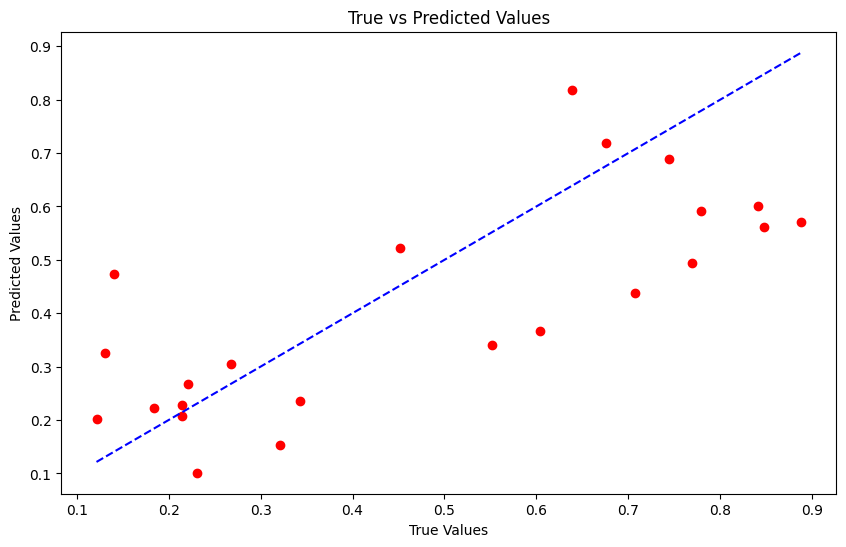

  0%|          | 0/23 [00:00<?, ?it/s]

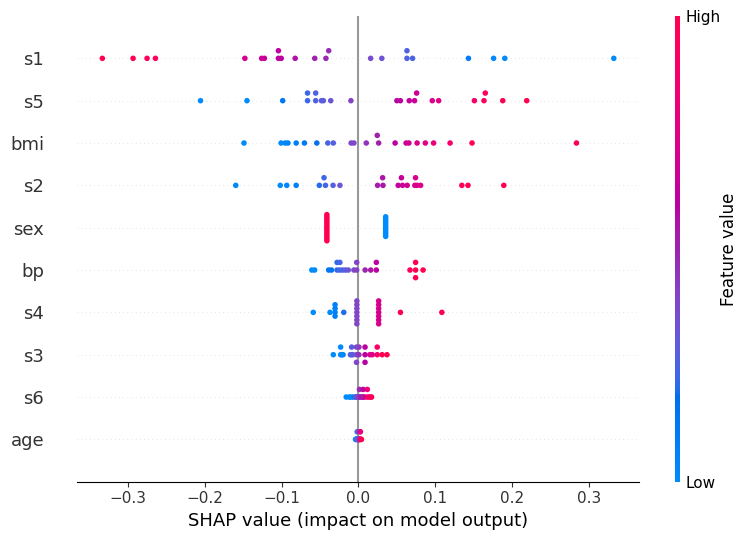

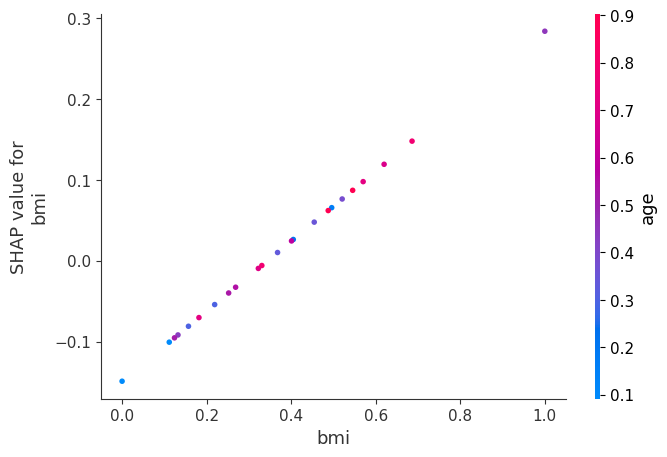

╒═════════════════════════╤═══════════╤═══════════╕
│ Metric                  │      Test │     Train │
╞═════════════════════════╪═══════════╪═══════════╡
│ Mean Squared Error      │ 0.0341234 │ 0.0274766 │
├─────────────────────────┼───────────┼───────────┤
│ Mean Absolute Error     │ 0.153515  │ 0.133844  │
├─────────────────────────┼───────────┼───────────┤
│ Root Mean Squared Error │ 0.184725  │ 0.165761  │
├─────────────────────────┼───────────┼───────────┤
│ R2 Score                │ 0.516379  │ 0.513588  │
╘═════════════════════════╧═══════════╧═══════════╛


In [90]:
y_pred_test_linear = linear.predict(x_test)
y_pred_train_linear = linear.predict(x_train)
evaluate_all(linear.model, False, y_test, y_pred_test_linear, y_train, y_pred_train_linear)

#### Random Forest Regression Model

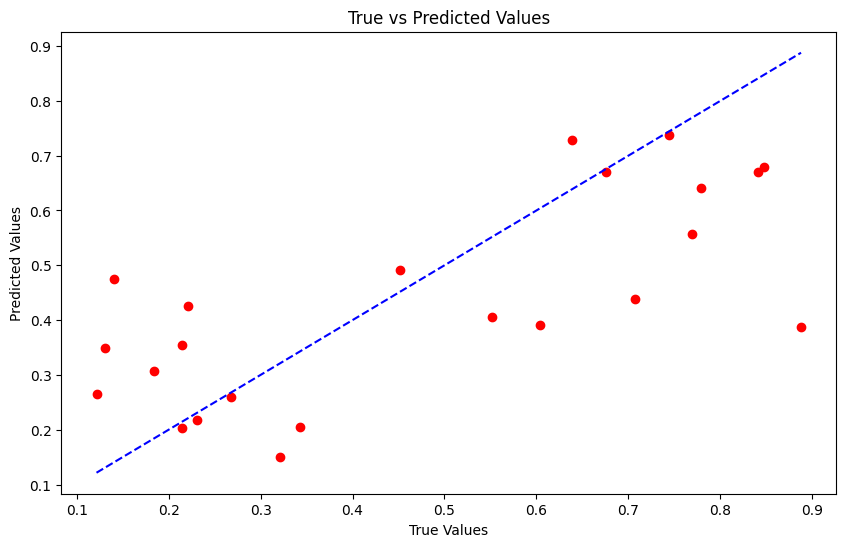

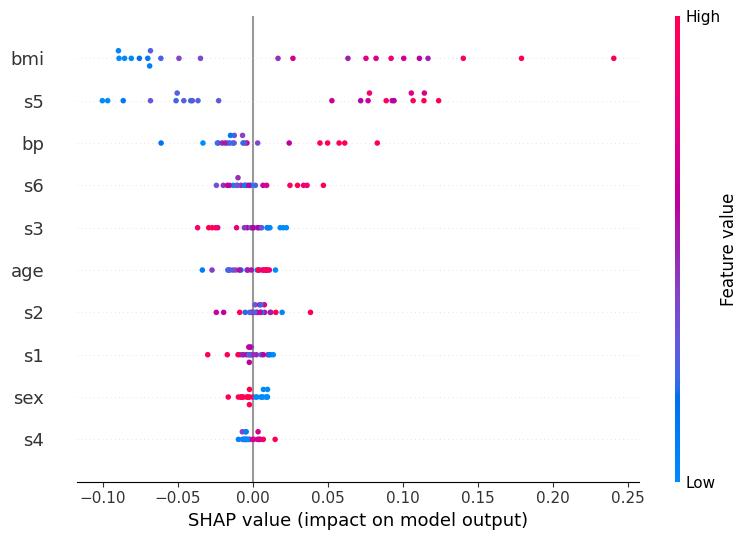

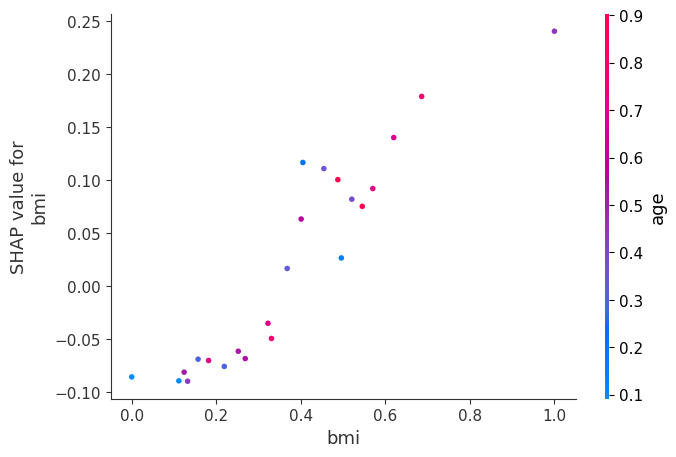

╒═════════════════════════╤══════════╤════════════╕
│ Metric                  │     Test │      Train │
╞═════════════════════════╪══════════╪════════════╡
│ Mean Squared Error      │ 0.035887 │ 0.00450611 │
├─────────────────────────┼──────────┼────────────┤
│ Mean Absolute Error     │ 0.150615 │ 0.0546077  │
├─────────────────────────┼──────────┼────────────┤
│ Root Mean Squared Error │ 0.189439 │ 0.0671276  │
├─────────────────────────┼──────────┼────────────┤
│ R2 Score                │ 0.491385 │ 0.920229   │
╘═════════════════════════╧══════════╧════════════╛


In [91]:
y_pred_test_random_forest = random_forest.predict(x_test)
y_pred_train_random_forest = random_forest.predict(x_train)
evaluate_all(random_forest.model, True, y_test, y_pred_test_random_forest, y_train, y_pred_train_random_forest)

#### Neural Network Regression Model

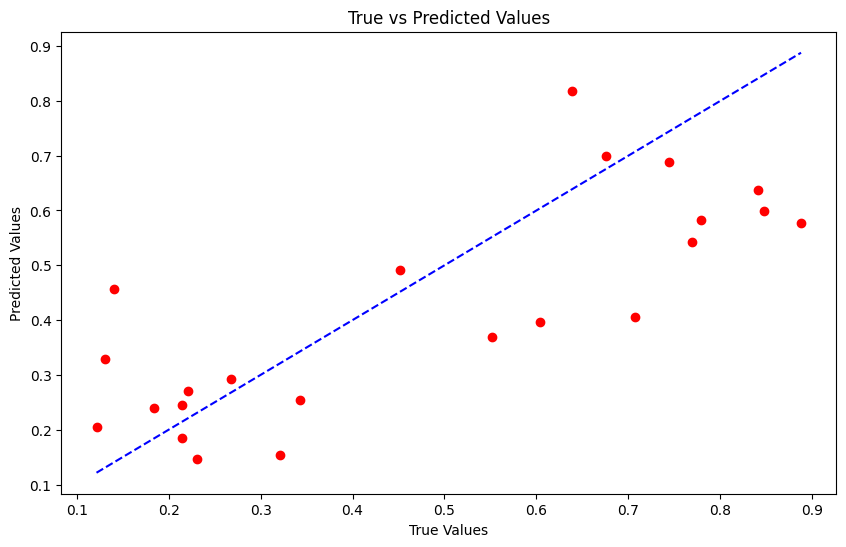

  0%|          | 0/23 [00:00<?, ?it/s]

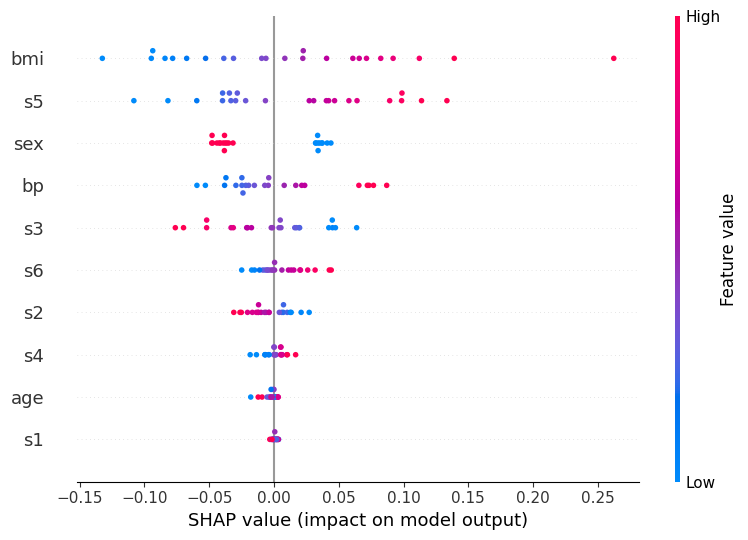

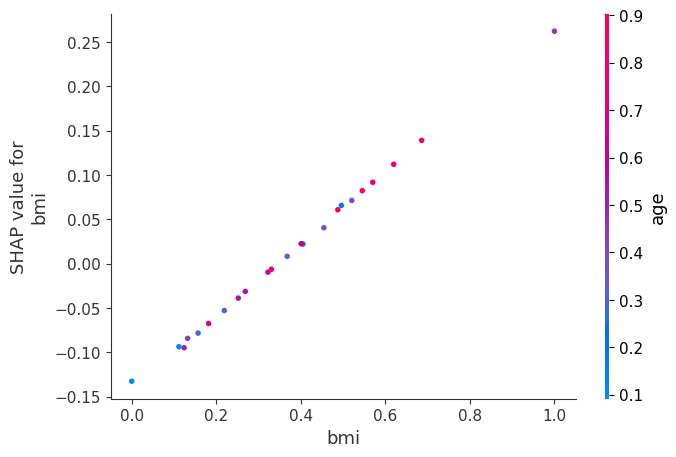

╒═════════════════════════╤═══════════╤═══════════╕
│ Metric                  │      Test │     Train │
╞═════════════════════════╪═══════════╪═══════════╡
│ Mean Squared Error      │ 0.0301249 │ 0.0272025 │
├─────────────────────────┼───────────┼───────────┤
│ Mean Absolute Error     │ 0.143825  │ 0.132956  │
├─────────────────────────┼───────────┼───────────┤
│ Root Mean Squared Error │ 0.173565  │ 0.164932  │
├─────────────────────────┼───────────┼───────────┤
│ R2 Score                │ 0.573048  │ 0.518441  │
╘═════════════════════════╧═══════════╧═══════════╛


In [92]:
y_pred_test_neural_network = neural_network.predict(x_test)
y_pred_train_neural_network = neural_network.predict(x_train)
evaluate_all(neural_network.model, False, y_test, y_pred_test_neural_network, y_train, y_pred_train_neural_network)

### Part 4. Ordinary Least Squares

Finally, we'll use OLS from the scipy library, train the model, and display the statistics obtained from this process.

OLS is a method for estimating the unknown parameters in a linear regression model. It minimizes the sum of the squared differences between the observed values and the values predicted by the linear approximation.

In [93]:
# code

## Questions

1. **Analyze and evaluate the values in Table (1).**

2. **Review the R² and Adjusted R² values obtained in part 4. Explain what these values indicate and what the implications of high or low values might be. Also, discuss the differences between these two metrics.**

3. **Review the p-values obtained in part 4 for each column of data and explain what these values indicate. Discuss what an appropriate value for p-values is and which columns currently have suitable values.**

4. **Assess and analyze the importance of each feature in the dataset based on the results obtained in part 4 regarding an individual's diabetic condition.**


## References

-  [Scikit-learn: Diabetes Dataset](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_diabetes.html)
-  [Diabetes Dataset](https://www4.stat.ncsu.edu/~boos/var.select/diabetes.html)
-  [Regression on Diabetes Dataset](https://shap.readthedocs.io/en/latest/example_notebooks/tabular_examples/model_agnostic/Diabetes%20regression.html)